In [1]:
import xml.etree.ElementTree as ET
import pandas as pd

import pprint
import re


# Input padplane mapping

In [2]:
map='PadPlane/AutoPad-R1-RevA.sch'
# map='PadPlane/AutoPad-R2-RevA-Pads.sch'
# map='PadPlane/AutoPad-R3-RevA.sch'

In [3]:
tree = ET.parse(map)
root = tree.getroot()

In [4]:
root

<Element 'eagle' at 0x2acac930e810>

In [5]:
Element=root[0]

In [6]:
schematic = Element.find("schematic")
sheets = schematic.find("sheets")

In [7]:

net_dict = {'Radius': [], 'Pad': [], 'U': [], 'G': [], 'Pin': [], 'PinColID': [], 'PinRowID': [], }

In [8]:
reZZ = re.compile('ZZ\.([0-9]+)\.([0-9]+)')
repart = re.compile('U\$([0-9]+)')
regate = re.compile('G\$([0-9]+)')
repin = re.compile('([A-Z])([0-9]+)')
pinColMap = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, }

for sheet in sheets:
# sheet = sheets.find("sheet")
    nets = sheet.find("nets")
    for net in nets:
    #     print(child.tag, child.attrib)

        name = net.attrib['name'];
        match = reZZ.search(name)

        if match:
#             print (f"Found {net.attrib} -> Radius = { match.group(1) }, Pad = { match.group(2) }")

            Radius = match.group(1) 
            Pad = match.group(2) 

            pinref = net.find("segment").find("pinref")
    #         print(pinref.tag, pinref.attrib)

            U = repart.search(pinref.attrib['part']).group(1) 
            G = regate.search(pinref.attrib['gate']).group(1) 
            PinCol = repin.search(pinref.attrib['pin']).group(1) 
            PinRow = repin.search(pinref.attrib['pin']).group(2) 


#             print (f"  {pinref.tag} {pinref} -> U = { U }, G = { G }, Pin = { Pin }")
            
            net_dict['Radius'].append(int(Radius))
            net_dict['Pad'].append(int(Pad))
            net_dict['U'].append(int(U))
            net_dict['G'].append(int(G))
            net_dict['Pin'].append(pinref.attrib['pin'])
            net_dict['PinColID'].append(pinColMap[PinCol])
            net_dict['PinRowID'].append(int(PinRow))
        

In [9]:
df = pd.DataFrame.from_dict(net_dict)
df.index.name = 'ID'
df

,Radius,Pad,U,G,Pin,PinColID,PinRowID
ID,,,,,,,
0,2,1,1,1,B3,1,3
1,0,1,1,1,B4,1,4
2,1,0,1,1,B5,1,5
3,10,0,1,1,B6,1,6
4,8,0,1,1,B7,1,7
...,...,...,...,...,...,...,...
1499,0,87,12,1,F9,5,9
1500,0,85,12,1,E16,4,16
1501,0,83,12,1,F16,5,16


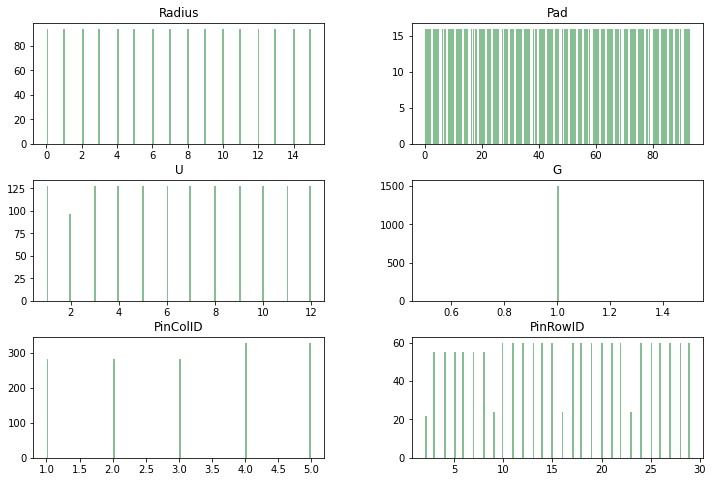

In [10]:
hist = df.hist(bins=128, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

# Input FEE mapping

In [11]:
df_fee_sch_revB = pd.read_csv("PadPlane/fee_sch_revB_3-9-20.csv", header=None)
df_fee_sch_revB

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,J1,A1,NaN,B1,NaN,C1,NaN,D1,NaN,E1,NaN,F1,NaN
1,J1,A2,NaN,B2,NaN,C2,NaN,D2,NaN,E2,pad30,F2,pad31
2,J1,A3,NaN,B3,pad28,C3,pad29,D3,pad26,E3,pad27,F3,pad24
3,J1,A4,NaN,B4,pad25,C4,pad22,D4,pad23,E4,pad20,F4,pad21
4,J1,A5,NaN,B5,pad18,C5,pad19,D5,pad16,E5,pad17,F5,pad14
5,J1,A6,NaN,B6,pad15,C6,pad12,D6,pad13,E6,pad10,F6,pad11
6,J1,A7,NaN,B7,pad8,C7,pad9,D7,pad6,E7,pad7,F7,pad4
7,J1,A8,NaN,B8,pad5,C8,pad2,D8,pad3,E8,pad0,F8,pad1
8,J1,A9,NaN,B9,NaN,C9,NaN,D9,NaN,E9,pad62,F9,pad63
9,J1,A10,NaN,B10,pad60,C10,pad61,D10,pad58,E10,pad59,F10,pad56


In [12]:
fee_dict = {}

for index, row in df_fee_sch_revB.iterrows():
    connector = row[0]
    
    for col in [4, 6, 8, 10, 12]:    
        if not pd.isna(row[col]): 
            fee_dict[f"{connector}_{row[col-1].strip()}"] = int(row[col].strip().strip('pad'))
        
fee_dict

{'J1_E2': 30,
 'J1_F2': 31,
 'J1_B3': 28,
 'J1_C3': 29,
 'J1_D3': 26,
 'J1_E3': 27,
 'J1_F3': 24,
 'J1_B4': 25,
 'J1_C4': 22,
 'J1_D4': 23,
 'J1_E4': 20,
 'J1_F4': 21,
 'J1_B5': 18,
 'J1_C5': 19,
 'J1_D5': 16,
 'J1_E5': 17,
 'J1_F5': 14,
 'J1_B6': 15,
 'J1_C6': 12,
 'J1_D6': 13,
 'J1_E6': 10,
 'J1_F6': 11,
 'J1_B7': 8,
 'J1_C7': 9,
 'J1_D7': 6,
 'J1_E7': 7,
 'J1_F7': 4,
 'J1_B8': 5,
 'J1_C8': 2,
 'J1_D8': 3,
 'J1_E8': 0,
 'J1_F8': 1,
 'J1_E9': 62,
 'J1_F9': 63,
 'J1_B10': 60,
 'J1_C10': 61,
 'J1_D10': 58,
 'J1_E10': 59,
 'J1_F10': 56,
 'J1_B11': 57,
 'J1_C11': 54,
 'J1_D11': 55,
 'J1_E11': 52,
 'J1_F11': 53,
 'J1_B12': 50,
 'J1_C12': 51,
 'J1_D12': 48,
 'J1_E12': 49,
 'J1_F12': 46,
 'J1_B13': 47,
 'J1_C13': 44,
 'J1_D13': 45,
 'J1_E13': 42,
 'J1_F13': 43,
 'J1_B14': 40,
 'J1_C14': 41,
 'J1_D14': 38,
 'J1_E14': 39,
 'J1_F14': 36,
 'J1_B15': 37,
 'J1_C15': 34,
 'J1_D15': 35,
 'J1_E15': 32,
 'J1_F15': 33,
 'J1_E16': 94,
 'J1_F16': 95,
 'J1_B17': 92,
 'J1_C17': 93,
 'J1_D17': 90,
 'J1_E17'

# Matching padplane and FEE

Now process the map to FFEs. Note the J1/J2 on FEE map to U2/U1. And FEE counting 0 is on the high U index side

In [13]:
df_processed = df.copy()

max_number_fee = df_processed['U'].max() / 2;

df_processed['FEE'] = df_processed.apply(lambda x: max_number_fee -1 - int ((x['U'] - 1) / 2) , axis=1)
df_processed['FEE_Connector'] = df_processed.apply(lambda x: f"J{(1-((x['U'] - 1) %  2)) + 1}" , axis=1) 
df_processed['FEE_Chan'] = df_processed.apply(lambda x: fee_dict[f"{x['FEE_Connector']}_{x['Pin']}"] , axis=1)
    
# df_processed['SAMPA'] = df_processed.apply(lambda x:  ((x['U'] - 1) %  2) *4 +  + pinRowSampaMap[x['PinRowID']], axis=1)
df_processed

,Radius,Pad,U,G,Pin,PinColID,PinRowID,FEE,FEE_Connector,FEE_Chan
ID,,,,,,,,,,
0,2,1,1,1,B3,1,3,5.0,J2,156
1,0,1,1,1,B4,1,4,5.0,J2,153
2,1,0,1,1,B5,1,5,5.0,J2,146
3,10,0,1,1,B6,1,6,5.0,J2,143
4,8,0,1,1,B7,1,7,5.0,J2,136
...,...,...,...,...,...,...,...,...,...,...
1499,0,87,12,1,F9,5,9,0.0,J1,63
1500,0,85,12,1,E16,4,16,0.0,J1,94
1501,0,83,12,1,F16,5,16,0.0,J1,95


R1 has a special SAMPA for sensing pads

In [14]:
if map == 'PadPlane/AutoPad-R1-RevA.sch':
    for i in range (0,32):
        df_processed.loc[len(df_processed.index)] = [-1,i,0,0,"",0,0,5,"J1",i]
        

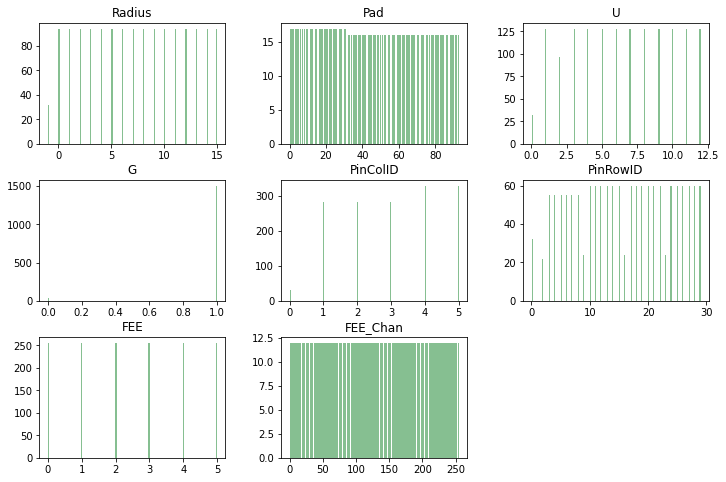

In [15]:
hist = df_processed.hist(bins=128, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

In [16]:
df_processed = df_processed.sort_values(by=['Radius', 'Pad'])
df_processed

,Radius,Pad,U,G,Pin,PinColID,PinRowID,FEE,FEE_Connector,FEE_Chan
ID,,,,,,,,,,
1504,-1,0,0,0,,0,0,5.0,J1,0
1505,-1,1,0,0,,0,0,5.0,J1,1
1506,-1,2,0,0,,0,0,5.0,J1,2
1507,-1,3,0,0,,0,0,5.0,J1,3
1508,-1,4,0,0,,0,0,5.0,J1,4
...,...,...,...,...,...,...,...,...,...,...
1279,15,89,11,1,C11,2,11,0.0,J2,182
1253,15,90,11,1,B8,1,8,0.0,J2,133
1276,15,91,11,1,C7,2,7,0.0,J2,137


In [17]:
df_processed.to_csv(f"{map}.ChannelMapping.csv")

In [18]:
df_processed['Pad'].max()

93

In [19]:
np.pi

NameError: name 'np' is not defined